# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [44]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [16]:
raw_data = pd.read_csv('real_estate_price_size_year_view.csv')
raw_data.head()


        price     size  year         view
0  234314.144   643.09  2015  No sea view
1  228581.528   656.22  2009  No sea view
2  281626.336   487.29  2018     Sea view
3  401255.608  1504.75  2015  No sea view
4  458674.256  1275.46  2009     Sea view
        price     size  year  view
0  234314.144   643.09  2015     0
1  228581.528   656.22  2009     0
2  281626.336   487.29  2018     1
3  401255.608  1504.75  2015     0
4  458674.256  1275.46  2009     1


In [19]:
raw_data.describe(include='all')

,price,size,year,view
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,No sea view
freq,NaN,NaN,NaN,51
mean,292289.470160,853.024200,2012.600000,NaN
std,77051.727525,297.941951,4.729021,NaN
min,154282.128000,479.750000,2006.000000,NaN
25%,234280.148000,643.330000,2009.000000,NaN
50%,280590.716000,696.405000,2015.000000,NaN
75%,335723.696000,1029.322500,2018.000000,NaN


## Create a dummy variable for 'view'

In [20]:
# print(raw_data.dtypes)
# raw_data['view'] = raw_data['view'].astype('category')
# raw_data['view'] = raw_data['view'].cat.codes
data = raw_data.copy()
data['view'] = raw_data['view'].map({'Sea view': 1, 'No sea view': 0})

        price     size  year         view
0  234314.144   643.09  2015  No sea view
1  228581.528   656.22  2009  No sea view
2  281626.336   487.29  2018     Sea view
3  401255.608  1504.75  2015  No sea view
4  458674.256  1275.46  2009     Sea view
        price     size  year  view
0  234314.144   643.09  2015     0
1  228581.528   656.22  2009     0
2  281626.336   487.29  2018     1
3  401255.608  1504.75  2015     0
4  458674.256  1275.46  2009     1


In [21]:
print(raw_data.head())
print(data.head())

        price     size  year         view
0  234314.144   643.09  2015  No sea view
1  228581.528   656.22  2009  No sea view
2  281626.336   487.29  2018     Sea view
3  401255.608  1504.75  2015  No sea view
4  458674.256  1275.46  2009     Sea view
        price     size  year  view
0  234314.144   643.09  2015     0
1  228581.528   656.22  2009     0
2  281626.336   487.29  2018     1
3  401255.608  1504.75  2015     0
4  458674.256  1275.46  2009     1


## Create the regression

### Declare the dependent and the independent variables

In [47]:
y = data[['price']]
x = data[['size', 'year', 'view']]

### Regression

In [59]:
stat_x = sm.add_constant(x)
model = sm.OLS(y, stat_x)
import statsmodels.formula.api as smf
model2 = smf.ols(formula='price ~ size + year + view', data=data)
fitmodel = model.fit()
fitmodel2 = model2.fit()
# print(fitmodel.summary())
fitmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Fri, 12 May 2023   Prob (F-statistic):           1.02e-50
Time:                        18:03:35   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

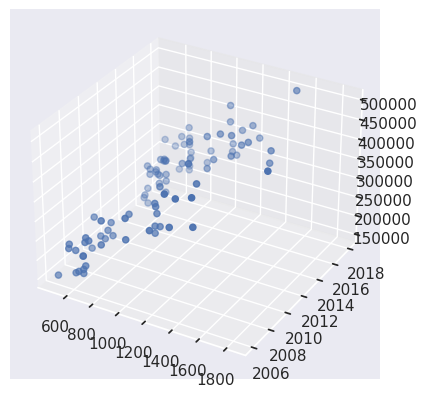

In [63]:
# I don't know how to plot the regression plane in this 3d
ax = plt.axes(projection ="3d")
ax.scatter3D(data[['size']], data[['year']], data[['price']])
yhat_no = -0.000054 + 223.0316*data['size'] + 2718.9489*data['year']
yhat_yes = -0.000054 + 223.0316*data['size'] + 2718.9489*data['year'] + 0.00057
# fig = ax.plot(data['size'], data['year'], yhat_no, lw=1, c='#006837')
# fig = ax.plot(data['size'], data['year'], yhat_yes, lw=1, c='#a50026')

In [65]:
stat_x

,const,size,year,view
0,1.0,643.09,2015,0
1,1.0,656.22,2009,0
2,1.0,487.29,2018,1
3,1.0,1504.75,2015,0
4,1.0,1275.46,2009,1
...,...,...,...,...
95,1.0,549.80,2009,1
96,1.0,1037.44,2009,0
97,1.0,1504.75,2006,0
98,1.0,648.29,2015,0


## Prediction

In [80]:
new_data = pd.DataFrame({'view':[1,0, 0], 'size':[600, 400, 600], 'year':[2000, 2023, 2000]})
new_data = new_data[['size', 'year', 'view']]
new_data

,size,year,view
0,600,2000,1
1,400,2023,0
2,600,2000,0


In [81]:
predictions = fitmodel2.predict(new_data)
predictions

0    230528.587176
1    191732.067928
2    173802.567378
dtype: float64

In [82]:
predictionsDF = pd.DataFrame({'Predicted price': predictions})
joined = new_data.join(predictionsDF)
joined

,size,year,view,Predicted price
0,600,2000,1,230528.587176
1,400,2023,0,191732.067928
2,600,2000,0,173802.567378
